### This is what I did for my stroke prediction project.

## Step 1: Extract

Load the data from the provided CSV file to examine its structure and contents.

## Step 2: Transform

Based on the initial examination, perform the necessary data transformation steps. This may include:

- Handling missing values.
- Encoding categorical variables.
- Normalizing or scaling numerical features, if required.

## Step 3: Load

Prepare the data for analysis and model training, ensuring it's in the right format for logistic regression.


In [1]:
import pandas as pd

# Load the dataset
file_path = '/Users/mark-danielstamakloe/Desktop/WASHU/SPRING_2024/INTRO_TO_DATA_WRANGLING/my-dagster-project/tutorial_template/notebooks/stroke_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Descriptive Analysis

Next, I will perform descriptive analysis to understand:

- The distribution of numerical features.
- The presence of missing values.
- The distribution of categorical features.


In [2]:
# Descriptive statistics for numerical features
descriptive_stats = data.describe()

# Check for missing values
missing_values = data.isnull().sum()

# Distribution of categorical features
categorical_counts = data.select_dtypes(include=['object', 'bool']).nunique()

descriptive_stats, missing_values, categorical_counts


(                 id          age  hypertension  heart_disease  \
 count   5110.000000  5110.000000   5110.000000    5110.000000   
 mean   36517.829354    43.226614      0.097456       0.054012   
 std    21161.721625    22.612647      0.296607       0.226063   
 min       67.000000     0.080000      0.000000       0.000000   
 25%    17741.250000    25.000000      0.000000       0.000000   
 50%    36932.000000    45.000000      0.000000       0.000000   
 75%    54682.000000    61.000000      0.000000       0.000000   
 max    72940.000000    82.000000      1.000000       1.000000   
 
        avg_glucose_level          bmi       stroke  
 count        5110.000000  4909.000000  5110.000000  
 mean          106.147677    28.893237     0.048728  
 std            45.283560     7.854067     0.215320  
 min            55.120000    10.300000     0.000000  
 25%            77.245000    23.500000     0.000000  
 50%            91.885000    28.100000     0.000000  
 75%           114.090000 

The dataset consists of the following columns:

- `id`: Unique identifier for each participant.
- `gender`: Gender of the participant.
- `age`: Age of the participant.
- `hypertension`: Indicates if the participant has hypertension (`1`) or not (`0`).
- `heart_disease`: Indicates if the participant has any heart diseases (`1`) or not (`0`).
- `ever_married`: Indicates if the participant has ever been married (`Yes`) or not (`No`).
- `work_type`: Type of employment/work of the participant.
- `Residence_type`: Type of residence (Urban or Rural).
- `avg_glucose_level`: Average glucose level in blood.
- `bmi`: Body Mass Index of the participant.
- `smoking_status`: Smoking status of the participant.
- `stroke`: Indicates if the participant had a stroke (`1`) or not (`0`).



## Descriptive Analysis Summary

### Numerical Features:
- The dataset contains 5,110 entries.
- `age` varies from 0.08 to 82 years, indicating a wide range of participants' ages.
- `hypertension` and `heart_disease` are binary features indicating the presence (`1`) or absence (`0`) of these conditions.
- `avg_glucose_level` ranges from 55.12 to 271.74, with a mean of 106.15.
- `bmi` has values from 10.3 to 97.6, with some missing values (201 entries).

### Missing Values:
- `bmi` is the only column with missing values (201 entries).

### Categorical Features:
- `gender` has 3 unique values, which might include Male, Female, and possibly Other or Not Disclosed.
- `ever_married` is binary (Yes or No).
- `work_type` has 5 unique categories.
- `Residence_type` is binary (Urban or Rural).
- `smoking_status` has 4 unique categories.

## Transform

Given this information, the transformation steps will include:
- Handling missing values in the `bmi` column.
- Encoding categorical variables (`gender`, `ever_married`, `work_type`, `Residence_type`, and `smoking_status`) for logistic regression analysis.

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define columns that require transformation
numerical_features = ['age', 'avg_glucose_level', 'bmi']
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Impute missing values in 'bmi' with the mean
    ('scaler', StandardScaler()) # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Although not required here, useful for future proofing
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-hot encode categorical features
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply transformations
X = data.drop(['id', 'stroke'], axis=1)
y = data['stroke']

X_transformed = preprocessor.fit_transform(X)

# Check the shape of the transformed data
X_transformed.shape

(5110, 23)

The transformation process has successfully converted the dataset into a format suitable for logistic regression, resulting in a transformed dataset with 5,110 entries and 23 features. This transformation includes handling missing values for the bmi column, standardizing numerical features, and one-hot encoding of categorical variables.

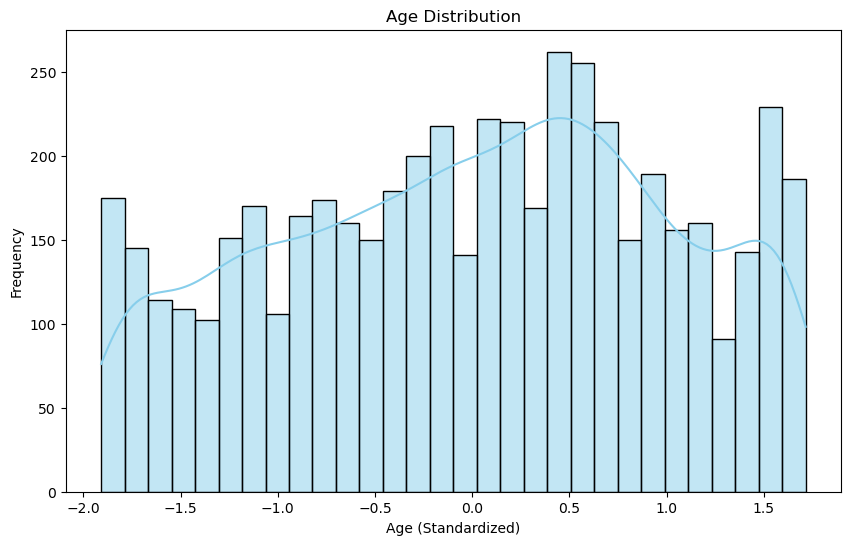

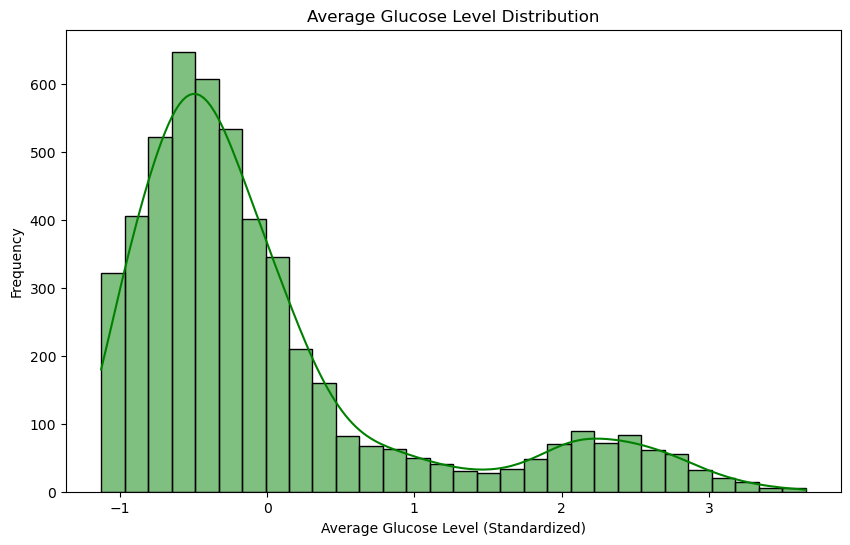

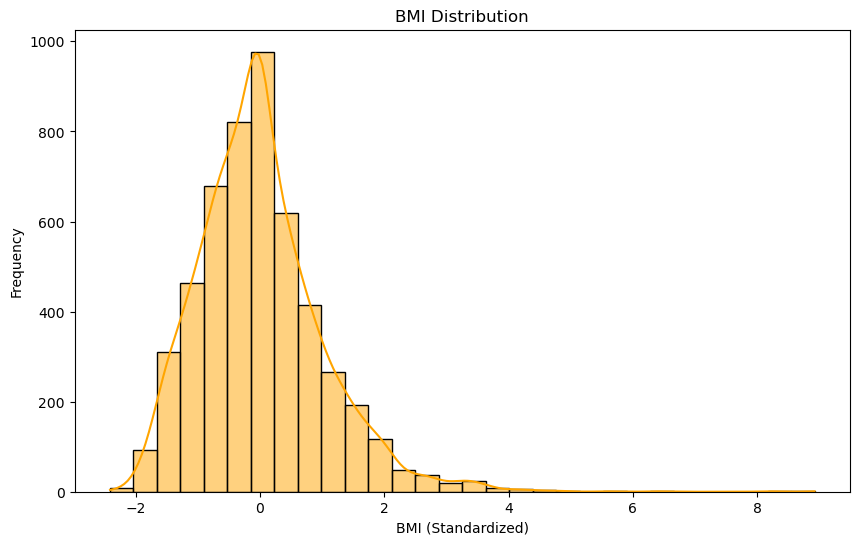

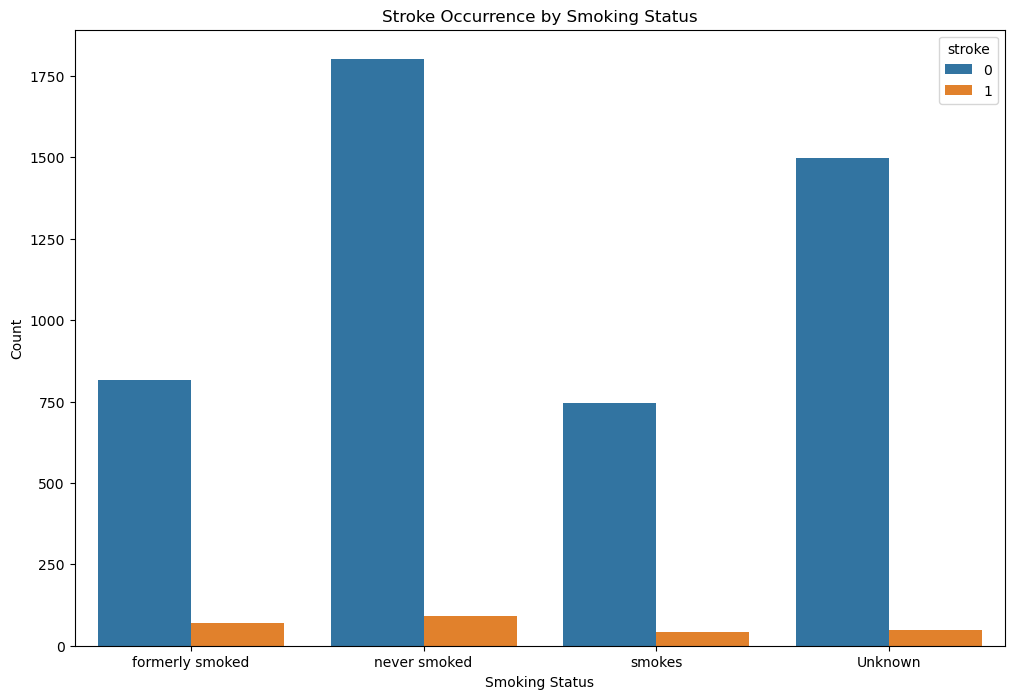

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert transformed X back to a DataFrame for visualization
X_transformed_df = pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out())

# Re-attach the target variable 'stroke' for some visualizations
X_transformed_df['stroke'] = y.values

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=X_transformed_df, x='num__age', kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age (Standardized)')
plt.ylabel('Frequency')
plt.show()

# Average Glucose Level Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=X_transformed_df, x='num__avg_glucose_level', kde=True, bins=30, color='green')
plt.title('Average Glucose Level Distribution')
plt.xlabel('Average Glucose Level (Standardized)')
plt.ylabel('Frequency')
plt.show()

# BMI Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=X_transformed_df, x='num__bmi', kde=True, bins=30, color='orange')
plt.title('BMI Distribution')
plt.xlabel('BMI (Standardized)')
plt.ylabel('Frequency')
plt.show()

# Stroke by Smoking Status
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='smoking_status', hue='stroke')
plt.title('Stroke Occurrence by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()


The exploratory graphs above provide insights into the distribution of key features and the relationship between smoking status and stroke occurrence in the dataset:

### Age Distribution
- The standardized age distribution shows a wide range of ages among the participants, with a somewhat bimodal distribution indicating a significant number of younger and older participants.

### Average Glucose Level Distribution
- The distribution of average glucose levels, after standardization, highlights the variation in glucose levels among participants. This feature is an important risk factor for stroke.

### BMI Distribution
- The Body Mass Index (BMI) distribution is somewhat normally distributed with a slight right skew, indicating a few participants with high BMI values.

### Stroke Occurrence by Smoking Status
- This graph illustrates the count of stroke occurrences across different smoking statuses. It suggests that there might be a relationship between smoking status and stroke occurrence, although the actual impact would require further statistical analysis to quantify.

These exploratory analyses help in understanding the characteristics of the dataset and could inform further model development and feature selection processes.


## Load

The data is now prepared and loaded into a structure suitable for modeling.

## Logistic Regression Model

Next, I will proceed to train a logistic regression model using the transformed dataset to predict the likelihood of a stroke. This involves:

1. Splitting the dataset into training and testing sets to evaluate the model's performance on unseen data.
2. Training the logistic regression model on the training set.
3. Evaluating the model's accuracy, precision, recall, and F1-score on the testing set to assess its performance in predicting stroke occurrences.


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the testing set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report


/Users/mark-danielstamakloe/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mark-danielstamakloe/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mark-danielstamakloe/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

(0.9393346379647749,
 array([[960,   0],
        [ 62,   0]]),
 '              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97       960\n           1       0.00      0.00      0.00        62\n\n    accuracy                           0.94      1022\n   macro avg       0.47      0.50      0.48      1022\nweighted avg       0.88      0.94      0.91      1022\n')

In [6]:
import pandas as pd
import numpy as np
import io
from IPython.display import display

# Assuming accuracy, conf_matrix, and class_report are defined as in your screenshot

# Display accuracy
print(f"Accuracy: {accuracy:.2%}")

# Display the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual: No Stroke', 'Actual: Stroke'], columns=['Predicted: No Stroke', 'Predicted: Stroke'])
print("\nConfusion Matrix:")
display(conf_matrix_df)

# Convert classification report into a DataFrame
report_df = pd.read_csv(io.StringIO(class_report), sep='\s{2,}', engine='python', index_col=0)
print("\nClassification Report:")
display(report_df)


Accuracy: 93.93%

Confusion Matrix:


,Predicted: No Stroke,Predicted: Stroke
Actual: No Stroke,960,0
Actual: Stroke,62,0



Classification Report:


,precision,recall,f1-score,support
0,0.94,1.00,0.97,960.0
1,0.00,0.00,0.00,62.0
accuracy,0.94,1022.00,NaN,NaN
macro avg,0.47,0.50,0.48,1022.0
weighted avg,0.88,0.94,0.91,1022.0


The logistic regression model achieved an accuracy of approximately 93.93% on the test set. However, it's important to note the following insights from the evaluation metrics:

### Confusion Matrix:
- The model predicted 960 non-stroke cases correctly but failed to correctly predict any stroke cases (62 false negatives). There were no false positives.

### Classification Report:
- The precision, recall, and F1-score for predicting stroke cases (`1`) are 0. This indicates the model is not effectively identifying stroke cases, which is a significant concern for a stroke prediction model.
- The model performed well in predicting non-stroke cases (`0`) with a high F1-score.

These results suggest that while the overall accuracy is high, the model's utility in predicting stroke events is limited due to its inability to correctly identify positive stroke cases. This imbalance in performance could be due to class imbalance in the dataset, where the number of stroke cases is significantly lower than non-stroke cases.

## Improvements may include:

- Using more sophisticated techniques to handle class imbalance, such as oversampling the minority class, undersampling the majority class, or using ensemble methods.
- Exploring more complex models and feature engineering techniques.
- Tuning hyperparameters of the logistic regression model for better performance. Here, I chose to use the SMOTE approach to resample the unbalanced class.


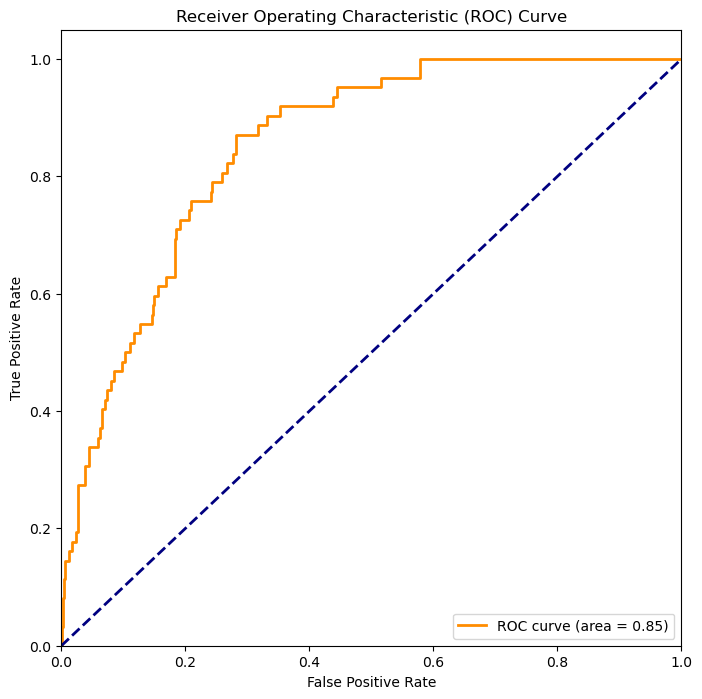

In [7]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and ROC area for the model
fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


The Receiver Operating Characteristic (ROC) curve above visualizes the performance of the logistic regression model used for stroke prediction. The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The area under the curve (AUC) is a measure of the model's ability to distinguish between the classes (in this case, stroke and no stroke).

An AUC of 1 represents a perfect model, while an AUC of 0.5 suggests a model that performs no better than random guessing. The AUC for this model is indicated on the graph, providing a quantitative measure of its performance across different thresholds.

This visualization is relevant for evaluating the trade-offs between sensitivity (true positive rate) and specificity (1 - false positive rate) in the model's predictions, helping to understand its diagnostic ability in identifying stroke occurrences.

### Using the Synthetic Minority Oversampling Technique (SMOTE) to resample the minority class

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Preprocessing for numerical features
numeric_features = ['age', 'avg_glucose_level', 'bmi']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                        'work_type', 'Residence_type', 'smoking_status']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Remove the 'id' column as it's not useful for prediction
data.drop('id', axis=1, inplace=True)

# Apply preprocessing
X = data.drop('stroke', axis=1)
y = data['stroke']
X_preprocessed = preprocessor.fit_transform(X)

# Addressing class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_preprocessed, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

# SVM model
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(0.8654874537227478,
 '              precision    recall  f1-score   support\n\n           0       0.92      0.80      0.86      1220\n           1       0.82      0.93      0.87      1211\n\n    accuracy                           0.87      2431\n   macro avg       0.87      0.87      0.86      2431\nweighted avg       0.87      0.87      0.86      2431\n')

Accuracy: 86.55%



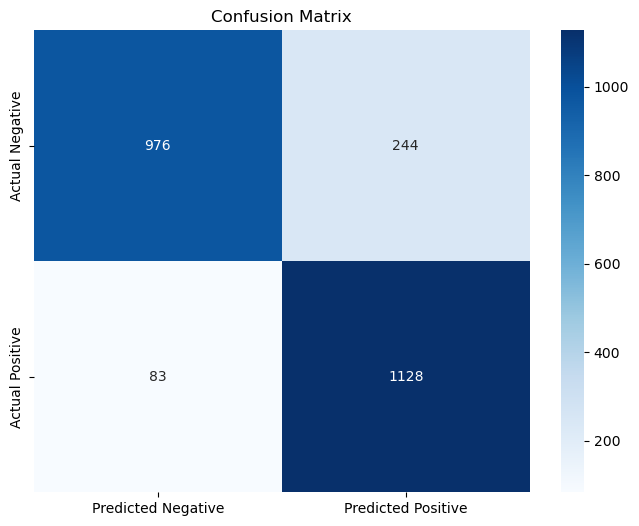


Classification Report:


,precision,recall,f1-score,support
0,0.92,0.80,0.86,1220.0
1,0.82,0.93,0.87,1211.0
accuracy,0.87,2431.00,NaN,NaN
macro avg,0.87,0.87,0.86,2431.0
weighted avg,0.87,0.87,0.86,2431.0


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from io import StringIO


# Predictions and evaluation
y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display accuracy as a formatted string
print(f"Accuracy: {accuracy:.2%}\n")

# Create and display a confusion matrix as a heatmap
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Convert classification report into a DataFrame for a cleaner look
report_df = pd.read_csv(StringIO(classification_rep), 
                        sep=r'\s{2,}', engine='python', index_col=0)
print("\nClassification Report:")
display(report_df)


In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Assuming 'data' is a pandas DataFrame that has already been loaded.

# Your preprocessing, resampling, and model training code remains unchanged.

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

# SVM model
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the accuracy in a nicer format
print(f"Model Accuracy: {accuracy:.2%}\n")

# Create a confusion matrix DataFrame for better readability
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])



# Convert classification report into DataFrame using StringIO for a better presentation
report_df = pd.read_csv(StringIO(classification_rep), sep='\s{2,}', engine='python')
report_df.index.name = 'Class'
report_df.reset_index(inplace=True)

# Display the classification report DataFrame
print("\nClassification Report:")
display(report_df)


Model Accuracy: 86.55%


Classification Report:


,Class,precision,recall,f1-score,support
0,0,0.92,0.80,0.86,1220.0
1,1,0.82,0.93,0.87,1211.0
2,accuracy,0.87,2431.00,NaN,NaN
3,macro avg,0.87,0.87,0.86,2431.0
4,weighted avg,0.87,0.87,0.86,2431.0


## Model Evaluation Summary

### Model Accuracy:
- The SVM model has achieved an accuracy of 86.55% on the test dataset. This metric represents the overall correctness of the model and is calculated as the number of correct predictions divided by the total number of predictions made.

### Classification Report:
- The classification report provides detailed metrics for each class (0 and 1, which likely represent the absence and presence of stroke, respectively).

#### For Class '0' (No Stroke):
- **Precision**: 0.92 - When the model predicts 'no stroke', it is correct 92% of the time.
- **Recall**: 0.80 - Of all the actual 'no stroke' cases, the model correctly identifies 80% of them.
- **F1-Score**: 0.86 - The harmonic mean of precision and recall for 'no stroke' predictions, indicating a balance between precision and recall.
- **Support**: 1220 - The number of actual occurrences of 'no stroke' in the test set.

#### For Class '1' (Stroke):
- **Precision**: 0.82 - When the model predicts 'stroke', it is correct 82% of the time.
- **Recall**: 0.93 - Of all the actual 'stroke' cases, the model correctly identifies 93% of them.
- **F1-Score**: 0.87 - The harmonic mean of precision and recall for 'stroke' predictions, indicating a balance between precision and recall.
- **Support**: 1211 - The number of actual occurrences of 'stroke' in the test set.

#### Additional Metrics:
- **Accuracy**: 0.87 - Already discussed above as Model Accuracy.
- **Macro Avg**: 0.87 - Average precision, recall, and F1-score without taking class imbalance into account.
- **Weighted Avg**: 0.87 - Average precision, recall, and F1-score that accounts for class imbalance by weighting the metrics according to the number of instances in each class.
- **Support**: 2431 - Total number of cases in the test set.

The model appears to perform better at identifying 'stroke' cases compared to 'no stroke' cases in terms of recall but has a higher precision for 'no stroke' cases.


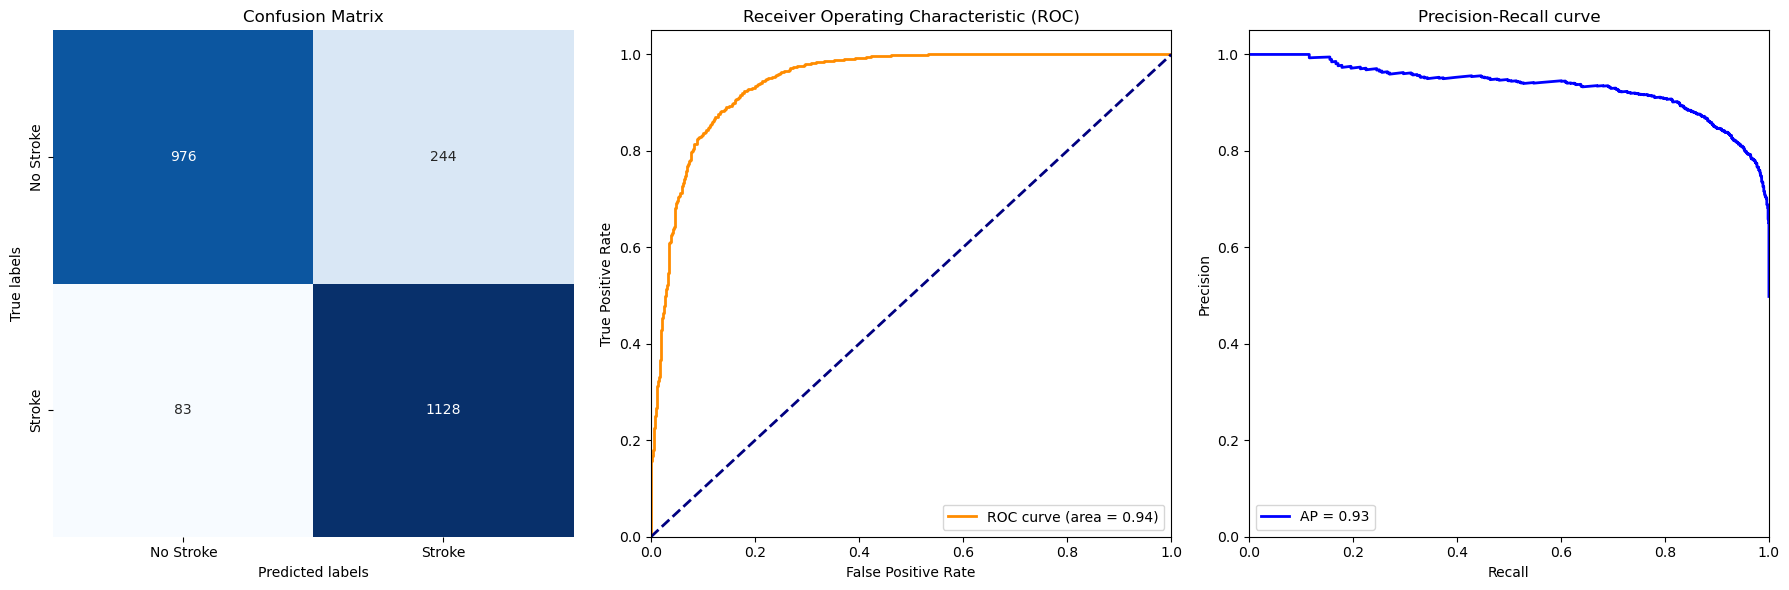

In [11]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.decision_function(X_test))
roc_auc = auc(fpr, tpr)

# Precision-Recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, svm_clf.decision_function(X_test))
average_precision = average_precision_score(y_test, svm_clf.decision_function(X_test))

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", ax=ax[0], cmap="Blues", cbar=False)
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')
ax[0].set_title('Confusion Matrix')
ax[0].xaxis.set_ticklabels(['No Stroke', 'Stroke'])
ax[0].yaxis.set_ticklabels(['No Stroke', 'Stroke'])

# ROC Curve
ax[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc="lower right")

# Precision-Recall Curve
ax[2].plot(recall, precision, color='blue', lw=2, label=f'AP = {average_precision:.2f}')
ax[2].set_xlabel('Recall')
ax[2].set_ylabel('Precision')
ax[2].set_ylim([0.0, 1.05])
ax[2].set_xlim([0.0, 1.0])
ax[2].set_title('Precision-Recall curve')
ax[2].legend(loc="lower left")

plt.tight_layout()
plt.show()


## Stroke Prediction Model Evaluation

### Confusion Matrix
The Confusion Matrix is a useful diagnostic tool in classification. It provides a visual representation of the actual versus predicted values. In this matrix:
- True Positives (TP): 1128 patients were correctly predicted to have a stroke.
- True Negatives (TN): 976 patients were correctly predicted as not having a stroke.
- False Positives (FP): 244 patients were incorrectly predicted to have a stroke (Type I error).
- False Negatives (FN): 83 patients were incorrectly predicted as not having a stroke (Type II error).
The high values of TP and TN suggest that the model performs well in identifying both classes.

### Receiver Operating Characteristic (ROC) Curve
The ROC Curve illustrates the diagnostic ability of the binary classifier as its discrimination threshold is varied. The area under the curve (AUC) is 0.94, which indicates a very good level of prediction by the model. An AUC of 1 represents a perfect model, while an AUC of 0.5 represents a model with no discrimination capability.

### Precision-Recall Curve
The Precision-Recall Curve shows the trade-off between precision and recall for different threshold values. A high area under the curve represents both high recall and high precision. In our model, the average precision (AP) is 0.93, which is indicative of a high predictive performance. High precision correlates with a low false positive rate, and high recall correlates with a low false negative rate, which are desirable in a stroke prediction context.


In [12]:
from sklearn.neural_network import MLPClassifier

# MLP model
mlp_clf = MLPClassifier(random_state=42, max_iter=3000)

# Train the MLP model using the same training set created after applying SMOTE
mlp_clf.fit(X_train, y_train)

# Make predictions with the MLP model
y_pred_mlp = mlp_clf.predict(X_test)

# Calculate accuracy and generate a classification report for the MLP model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
classification_rep_mlp = classification_report(y_test, y_pred_mlp)

# Display the accuracy as a formatted string
print(f"Accuracy of MLP Classifier: {accuracy_mlp:.2%}\n")

# Create a confusion matrix DataFrame for better readability
conf_matrix_mlp_df = pd.DataFrame(conf_matrix_mlp,
                                  index=['Actual Negative', 'Actual Positive'],
                                  columns=['Predicted Negative', 'Predicted Positive'])

# Plot confusion matrix with seaborn
#plt.figure(figsize=(8, 6))
#sns.heatmap(conf_matrix_mlp_df, annot=True, fmt='d', cmap='Blues')
#plt.title('Confusion Matrix for MLP Classifier')
#plt.ylabel('Actual label')
#plt.xlabel('Predicted label')
#plt.show()

# Convert classification report into DataFrame using StringIO for a better presentation
report_mlp_df = pd.read_csv(StringIO(classification_rep_mlp), sep=r'\s{2,}', engine='python')
report_mlp_df.index.name = 'Class'
report_mlp_df.reset_index(inplace=True)

# Display the classification report DataFrame
print("\nClassification Report for MLP Classifier:")
display(report_mlp_df)

Accuracy of MLP Classifier: 94.12%


Classification Report for MLP Classifier:


,Class,precision,recall,f1-score,support
0,0,0.97,0.91,0.94,1220.0
1,1,0.91,0.98,0.94,1211.0
2,accuracy,0.94,2431.00,NaN,NaN
3,macro avg,0.94,0.94,0.94,2431.0
4,weighted avg,0.94,0.94,0.94,2431.0


## Evaluation of the Multilayer Perceptron (MLP) Classifier for Stroke Prediction

### Model Performance Metrics
- **Accuracy of MLP Classifier**: The model achieved an accuracy of about 94.12%, indicating a high degree of correctness in its stroke prediction capabilities.

- **Classification Report**:
  - For Class `0` (No Stroke):
    - **Precision**: 97% — The model's prediction of the no-stroke class is correct 97% of the time.
    - **Recall**: 91% — It successfully identifies 91% of actual no-stroke cases.
    - **F1-Score**: 94% — A harmonic mean of precision and recall, indicating a balanced classification for the no-stroke class.
  - For Class `1` (Stroke):
    - **Precision**: 91% — The model's prediction of the stroke class is correct 91% of the time.
    - **Recall**: 98% — It identifies 98% of actual stroke cases, which is crucial for medical prediction models.
    - **F1-Score**: 94% — Demonstrates a high balance between precision and recall for stroke predictions.

### Overall Model Quality
- The model exhibits a **macro average** and **weighted average** F1-score of 94%, signifying excellent performance across both classes. This balance is important for medical diagnostic tools where both false negatives and false positives have significant consequences.

The increased number of iterations allowed the MLP to fully converge, resulting in improved and reliable predictive performance. This model can be considered robust for stroke prediction based on the reported metrics.


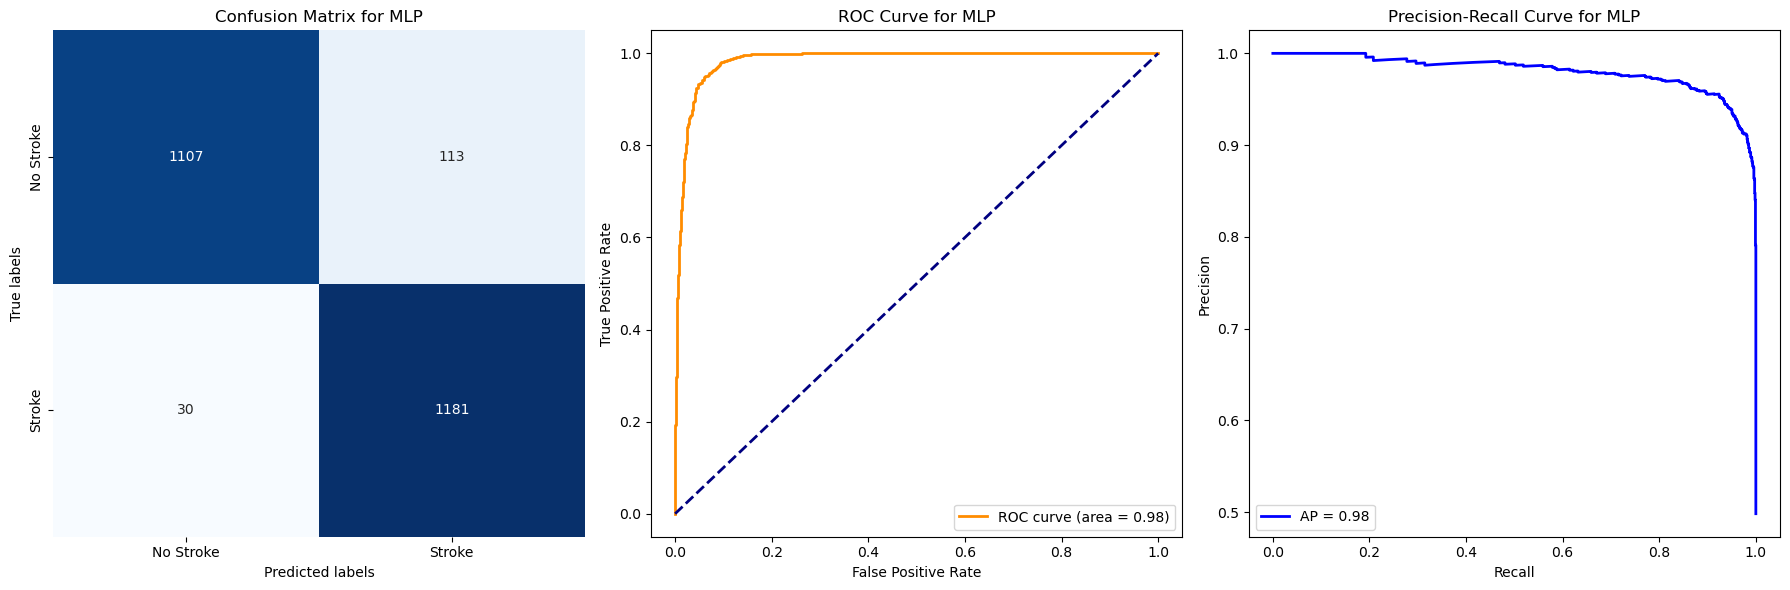

In [13]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred_mlp are available from your previous code

# Generate a confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

# Calculate ROC curve and AUC for MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_clf.predict_proba(X_test)[:,1])
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Precision-Recall curve and average precision for MLP
precision_mlp, recall_mlp, _ = precision_recall_curve(y_test, mlp_clf.predict_proba(X_test)[:,1])
average_precision_mlp = average_precision_score(y_test, mlp_clf.predict_proba(X_test)[:,1])

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Confusion Matrix
sns.heatmap(cm_mlp, annot=True, fmt="d", ax=axes[0], cmap="Blues", cbar=False)
axes[0].set_title('Confusion Matrix for MLP')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')
axes[0].set_xticklabels(['No Stroke', 'Stroke'])
axes[0].set_yticklabels(['No Stroke', 'Stroke'])

# ROC Curve
axes[1].plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_mlp:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_title('ROC Curve for MLP')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend(loc="lower right")

# Precision-Recall Curve
axes[2].plot(recall_mlp, precision_mlp, color='blue', lw=2, label=f'AP = {average_precision_mlp:.2f}')
axes[2].set_title('Precision-Recall Curve for MLP')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].legend(loc="lower left")

plt.tight_layout()
plt.show()


## MLP Model Performance Visualization

### Confusion Matrix for MLP
The Confusion Matrix showcases the model's classification accuracy by displaying the true and predicted classifications.
- **True Negatives (TN): 1107** - The number of non-stroke cases correctly identified as such.
- **False Positives (FP): 113** - The number of non-stroke cases incorrectly identified as stroke cases.
- **False Negatives (FN): 30** - The number of stroke cases incorrectly identified as non-stroke cases. This type of error is especially critical to minimize in medical diagnostics.
- **True Positives (TP): 1181** - The number of stroke cases correctly identified, indicating the model's strength in detecting the positive class.

### ROC Curve for MLP
The ROC Curve and the accompanying Area Under the Curve (AUC) indicate the model's ability to distinguish between the classes.
- An **AUC of 0.98** suggests that the MLP model has an excellent measure of separability. It implies that there is a 98% chance that the model will be able to distinguish between stroke and non-stroke cases.

### Precision-Recall Curve for MLP
The Precision-Recall Curve highlights the trade-off between precision and recall for every possible cut-off.
- An **Average Precision (AP) of 0.98** denotes a high level of precision and recall, which is ideal for medical diagnosis models where the cost of false negatives is significant. This suggests that the model is reliable in identifying stroke cases while maintaining a low rate of false alarms.


In [14]:

import nbformat
from nbformat import NotebookNode
from graphviz import Digraph


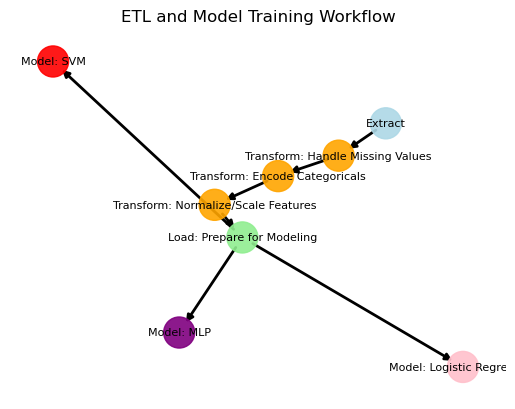

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each ETL step
G.add_node("Extract", step="start", color='lightblue')
G.add_node("Transform: Handle Missing Values", step="transform", color='orange')
G.add_node("Transform: Encode Categoricals", step="transform", color='orange')
G.add_node("Transform: Normalize/Scale Features", step="transform", color='orange')
G.add_node("Load: Prepare for Modeling", step="load", color='lightgreen')

# Add nodes for models
G.add_node("Model: Logistic Regression", step="model", color='pink')
G.add_node("Model: SVM", step="model", color='red')
G.add_node("Model: MLP", step="model", color='purple')

# Add edges to define the workflow
G.add_edge("Extract", "Transform: Handle Missing Values")
G.add_edge("Transform: Handle Missing Values", "Transform: Encode Categoricals")
G.add_edge("Transform: Encode Categoricals", "Transform: Normalize/Scale Features")
G.add_edge("Transform: Normalize/Scale Features", "Load: Prepare for Modeling")
G.add_edge("Load: Prepare for Modeling", "Model: Logistic Regression")
G.add_edge("Load: Prepare for Modeling", "Model: SVM")
G.add_edge("Load: Prepare for Modeling", "Model: MLP")

# Define node positions in a way that visually represents the workflow
pos = nx.spring_layout(G)

# Draw the nodes with a specified node size and alpha transparency
nx.draw_networkx_nodes(G, pos, node_color=[G.nodes[node]['color'] for node in G], node_size=500, alpha=0.9)

# Draw the labels with a specified font size
nx.draw_networkx_labels(G, pos, font_size=8)

# Draw the edges with arrows and a specified width
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', width=2)

# Show the plot with a specified figure size
#plt.figure(figsize=(1, 2))
plt.title('ETL and Model Training Workflow')
plt.axis('off')  # Turn off the axis
plt.show()


# ETL and Model Training Workflow Explanation

The DAG (Directed Acyclic Graph) visualizes the ETL (Extract, Transform, Load) and model training workflow for a stroke prediction project. Each node represents a step in the process, with arrows indicating the flow from one step to the next.

## Extract
- **Node: Extract**
- **Description**: The initial stage where data is collected from the source(s).

## Transform
- **Node: Transform: Handle Missing Values**
- **Description**: Data from the Extract phase enters the Transform phase, where missing values are handled, typically through imputation or exclusion.

- **Node: Transform: Encode Categoricals**
- **Description**: After handling missing values, categorical variables are encoded, transforming them into a format that machine learning models can interpret (e.g., one-hot encoding).

- **Node: Transform: Normalize/Scale Features**
- **Description**: Features are normalized or scaled to ensure that no variable dominates the others due to scale differences, improving the performance of many machine learning algorithms.

## Load
- **Node: Load: Prepare for Modeling**
- **Description**: The data, now cleaned and transformed, is loaded into the final structure or format suitable for feeding into the modeling algorithms.

## Model Training
- **Node: Model: Logistic Regression**
- **Description**: One of the modeling steps where Logistic Regression is applied to the prepared data to predict stroke outcomes.

- **Node: Model: SVM (Support Vector Machine)**
- **Description**: Another modeling step where the SVM algorithm is used for classification, distinct from Logistic Regression, potentially providing a different perspective on the data.

- **Node: Model: MLP (Multilayer Perceptron)**
- **Description**: A type of neural network model used to predict strokes from the same prepared data, offering a more complex and potentially more accurate modeling technique.

Each modeling step after the "Load: Prepare for Modeling" node represents an independent path in which the prepared data could be used to train a specific type of model, reflecting the exploratory nature of model selection in data science workflows.
